# Analytics Challenge 2020

## Import proper libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
data = pd.read_csv('C:/Users/Colin/AnalyticsChallenge2020/Data/AnalyticsChallenge2020Data.csv')

In [3]:
data.head(10)

,GameID,EventID,Season,Week,StadiumName,OffensiveTeam,DefensiveTeam,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,...,Pressure,SoloSack,AssistedSack,PassBreakup,Interception,ForcedFumble,RecoveredFumble,AAV,rookie,z-score
0,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,636964,1,-0.3
1,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,17000000,0,0.4
2,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,21000000,0,-0.9
3,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,8387966,1,0.7
4,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,636964,1,-0.3
5,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,17000000,0,0.4
6,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,21000000,0,-0.9
7,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,8387966,1,0.7
8,2630,20,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,636964,1,-0.3
9,2630,20,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,17000000,0,0.4


### Which is the most valuable defensive line position?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74012 entries, 0 to 74011
Data columns (total 55 columns):
GameID                74012 non-null int64
EventID               74012 non-null int64
Season                74012 non-null int64
Week                  74012 non-null int64
StadiumName           74012 non-null object
OffensiveTeam         74012 non-null object
DefensiveTeam         74012 non-null object
OffTeamScoreBefore    74012 non-null int64
DefTeamScoreBefore    74012 non-null int64
Quarter               74012 non-null int64
TimeLeft              74012 non-null int64
Down                  74012 non-null int64
ToGo                  74012 non-null int64
SideOfField           74012 non-null object
StartYard             74012 non-null int64
EventType             74012 non-null object
FirstDown             74012 non-null int64
Touchdown             74012 non-null int64
Safety                74012 non-null int64
Turnover              74012 non-null int64
RunDirection          3202

--- **Filter down to only DE and DT for Roster Positions**

In [5]:
data[data['RosterPosition'].isin(['DE','DT'])][['RosterPosition','OffTeamScoreBefore','DefTeamScoreBefore','Quarter','TimeLeft','Down',
      'ToGo','StartYard','FirstDown','Touchdown','Turnover','OffensiveYardage','EPA','EventType','TechniqueName','AAV','rookie']].groupby('RosterPosition').mean().round(2)

,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,TimeLeft,Down,ToGo,StartYard,FirstDown,Touchdown,Turnover,OffensiveYardage,EPA,AAV,rookie
RosterPosition,,,,,,,,,,,,,,
DE,10.58,12.45,2.59,416.01,1.82,8.55,29.48,0.29,0.04,0.02,5.30,-0.03,6597537.13,0.34
DT,10.70,11.73,2.55,441.22,1.69,8.46,28.86,0.28,0.04,0.02,5.23,-0.03,5353871.95,0.35


- DT tends to be in higher leverage position (score delta is lower)
- DE involved in more rushing

In [55]:
data['SideOfBall'].fillna('C', inplace=True)

In [56]:
main = data[data['RosterPosition'].isin(['DE','DT'])]

Text(0.5,1,'Representation by Position')

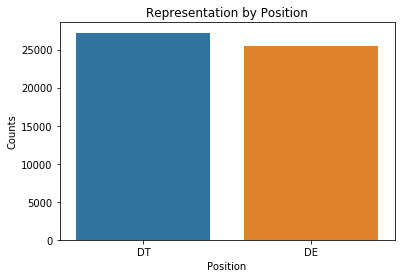

In [8]:
pos_counts = pd.DataFrame(pd.value_counts(main['RosterPosition']))
sns.barplot(x = pos_counts.index, y = 'RosterPosition', data = pos_counts)
plt.xlabel('Position')
plt.ylabel('Counts')
plt.title('Representation by Position')

In [57]:
main['combination'] = main['RosterPosition']+main['SideOfBall']+main['TechniqueName']
main['Delta'] = main['DefTeamScoreBefore'] - main['OffTeamScoreBefore']
main.loc[main['EventType'] == 'rush', 'RushPlay'] = 1

main['combination'].value_counts()[0:5]

C:\Users\Colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Colin\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

DTL3    5449
DTR3    4474
DTR1    3216
DER9    3047
DTL1    2833
Name: combination, dtype: int64

In [38]:
ad = main[main['combination'].isin(['DER4i'])]

per_combo = pd.DataFrame(ad[['combination','Name','Down']]
                         .groupby(['combination','Name'])
                         .agg({'Down':'size'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','name':'Player'})                        
                        .sort_values('Count',ascending=False))

per_combo

,Position Alignment,Name,Count
12,DER4i,Cameron Heyward,54
52,DER4i,Jonathan Allen,49
29,DER4i,Denico Autry,47
16,DER4i,Carlos Watkins,39
83,DER4i,Trey Flowers,35
49,DER4i,Jihad Ward,31
76,DER4i,Roy Robertson-Harris,28
4,DER4i,Angelo Blackson,24
60,DER4i,Leonard Williams,23
7,DER4i,Branden Jackson,22


In [58]:
per_combo = pd.DataFrame(main[['combination','EPA','Down','Delta']]
                         .groupby(['combination'])
                         .agg({'Down':'size', 'EPA':'mean','Delta':'mean'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','EPA':'Avg EPA','Delta':'Average Score Delta'})                        
                        .sort_values('Avg EPA'))

per_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1     107.7
0.2     228.4
0.3     302.2
0.4     439.4
0.5     742.5
0.6     993.6
0.7    1289.9
0.8    1723.0
0.9    2743.4
1.0    5449.0
Name: Count, dtype: float64

In [59]:
high_freq = per_combo[per_combo['Count'] > 993]
high_freq

,Position Alignment,Count,Avg EPA,Average Score Delta
23,DEROutside,1801,-0.104577,1.005552
28,DTL2i,1514,-0.069014,1.708058
24,DTC0,2170,-0.060480,1.086175
10,DEL7,1079,-0.047380,1.324374
39,DTR2i,1986,-0.046978,2.562437
21,DER7,1301,-0.044809,0.651038
5,DEL3,1520,-0.042318,2.351316
12,DELOutside,1871,-0.035217,1.972742
20,DER6,1036,-0.035165,0.449807
11,DEL9,2705,-0.029185,3.434750


In [9]:
coef = {'Position Alignment' : ['DEL5','DEL6','DEL7','DEL9','DELOutside','DER3','DER5','DER6','DER7','DER9','DEROutside','DTC0','DTL1','DTL2i','DTL3','DTR1','DTR2i','DTR3','DEL3'],'Hex Effect on EPA' : [-0.0679,-0.029,-0.0344,0.0025,-0.0167,-0.0359,-0.0048,-0.0581,-0.0254,-0.0078,-0.0386,-0.056,-0.0275,-0.0494,-0.0268,-0.0207,-0.0467,-0.029,0]}
coef_effect = pd.DataFrame(data=coef)
high_freq = high_freq.merge(coef_effect)

In [43]:
#combos.to_csv('C:/Users/Colin/AnalyticsChallenge2020/Data/combos.csv')
high_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 5 columns):
Position Alignment     19 non-null object
Count                  19 non-null int64
Avg EPA                19 non-null float64
Average Score Delta    19 non-null float64
Hex Effect on EPA      19 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 912.0+ bytes


### Score Delta X/Y

In [44]:
main[['EventType','Delta','EPA']].groupby('EventType').mean().round(2)

,Delta,EPA
EventType,,
challenge pass,2.44,-0.27
challenge rush,-1.85,-0.36
pass,3.12,-0.02
rush,-0.76,-0.05


In [45]:
import matplotlib.patches as mpatches

C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


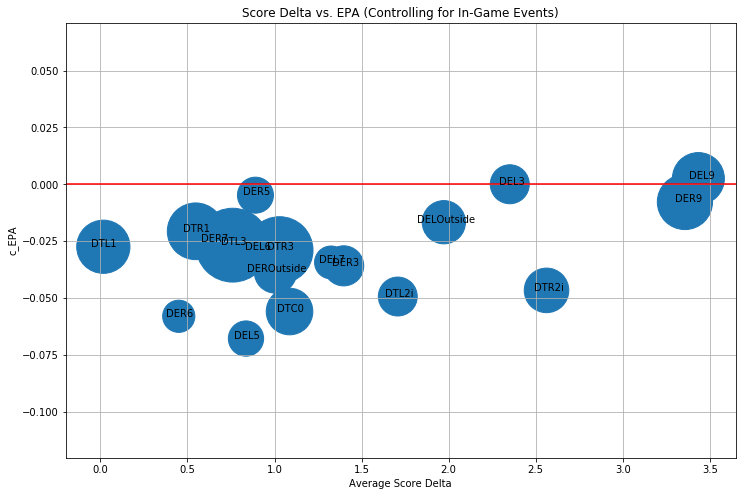

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Average Score Delta'],high_freq['Hex Effect on EPA'],s=high_freq['Count'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Average Score Delta'],high_freq['Hex Effect on EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Average Score Delta')
plt.ylabel('c_EPA')
plt.title('Score Delta vs. EPA (Controlling for In-Game Events)')
plt.axhline(0, color = 'red')
plt.grid()
plt.show()

### Linear Model for Position Alignments

In [10]:
from statsmodels.formula.api import ols

In [11]:
model_data = main[main['combination'].isin(high_freq['Position Alignment'])]
model_data.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'RunDirection',
       'UsedDesignedGap', 'Attempt', 'Completion', 'Spike', 'ThrowDepth',
       'PressureOnPlay', 'SackOnPlay', 'PassBreakupOnPlay',
       'InterceptionOnPlay', 'FumbleByPasser', 'FumbleByRusher',
       'FumbleByReceiver', 'OffensiveYardage', 'EPA', 'PlayDesc', 'PlayerId',
       'Name', 'RosterPosition', 'OnFieldPosition', 'SideOfBall',
       'TechniqueName', 'IsRushing', 'SoloTackle', 'AssistedTackle',
       'Pressure', 'SoloSack', 'AssistedSack', 'PassBreakup', 'Interception',
       'ForcedFumble', 'RecoveredFumble', 'AAV', 'rookie', 'z-score',
       'combination', 'Delta', 'RushPlay'],
      dtype='object')

In [12]:
model = ols('EPA ~ ToGo + C(SideOfField) + StartYard + RushPlay + Touchdown + Safety + Turnover + OffensiveYardage + AssistedTackle + SoloSack + AssistedSack + PassBreakup + C(combination)', data = model_data)
fitted_model = model.fit()
fitted_model.summary()

C:\Users\Colin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EPA   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1770.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:23:31   Log-Likelihood:                -11582.
No. Observations:               18456   AIC:                         2.322e+04
Df Residuals:                   18429   BIC:                         2.343e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1376      0.010    -13.255      0.000      -0.158      -0.117
C(SideOfField)[T.Own]           -0.0425      0.007     -6.088      0.000      -0.056      -0.029
C(combination)[T.DEL5]          -0.0679      0.025     -2.674      0.008      -0.118      -0.018
C(combination)[T.DEL6]          -0.0290      0.025     -1.171      0.242      -0.078       0.020
C(combination)[T.DEL7]          -0.0344      0.026     -1.301      0.193      -0.086       0.017
C(combination)[T.DEL9]           0.0025      0.024      0.102      0.919      -0.045       0.050
C(combination)[T.DELOutside]    -0.0167      0.024     -0.687      0.492      -0.064       0.031
C(combination)[T.DER3]          -0.0359      0.025     -1.440      0.150      -0.085       0.013
C(combination)[T.DER5]          -0.0048      0.025     -0.193      0.847      -0.054       0.044
C(combination)[T.DER6]          -0.0581      0.026     -2.254      0.024      -0.109      -0.008
C(combination)[T.DER7]          -0.0254      0.025     -0.999      0.318      -0.075       0.024
C(combination)[T.DER9]          -0.0078      0.024     -0.328      0.743      -0.054       0.039
C(combination)[T.DEROutside]    -0.0386      0.024     -1.579      0.114      -0.086       0.009
C(combination)[T.DTC0]          -0.0560      0.023     -2.419      0.016      -0.101      -0.011
C(combination)[T.DTL1]          -0.0275      0.021     -1.292      0.196      -0.069       0.014
C(combination)[T.DTL2i]         -0.0494      0.025     -2.000      0.046      -0.098      -0.001
C(combination)[T.DTL3]          -0.0268      0.020     -1.351      0.177      -0.066       0.012
C(combination)[T.DTR1]          -0.0207      0.021     -0.989      0.323      -0.062       0.020
C(combination)[T.DTR2i]         -0.0467      0.023     -2.020      0.043      -0.092      -0.001
C(combination)[T.DTR3]          -0.0290      0.020     -1.417      0.157      -0.069       0.011
ToGo                            -0.0097      0.001    -10.205      0.000      -0.012      -0.008
StartYard                       -0.0011      0.000     -4.121      0.000      -0.002      -0.001
RushPlay                        -0.1376      0.010    -13.255      0.000      -0.158      -0.117
Touchdown                        0.8191      0.020     41.329      0.000       0.780       0.858
Safety                          -1.1899      0.203     -5.857      0.000      -1.588      -0.792
Turnover                        -4.2710      0.042   -102.311      0.000      -4.353      -4.189
OffensiveYardage                 0.0919      0.001    167.985      0.000       0.091       0.093
AssistedTackle                  -0.0316      0.014     -2.276      0.023      -0.059      -0.004
SoloSack                              0          0        nan        nan    

In [47]:
model_data[['combination','Turnover','FirstDown']].groupby('combination').mean().round(2)

,Turnover,FirstDown
combination,,
DEL3,0.02,0.30
DEL5,0.02,0.29
DEL6,0.02,0.29
DEL7,0.02,0.27
DEL9,0.03,0.29
DELOutside,0.02,0.28
DER3,0.01,0.31
DER5,0.02,0.28
DER6,0.01,0.27


## What is the nature of the distribution of talent between the defensive line positions, as you define them?

### Player level Frequency at each Position Alignment

In [60]:
player_combo = pd.DataFrame(main[['combination','Name','EPA','Down','Delta']]
                 .groupby(['combination','Name'])
                 .agg({'Down':'size', 'EPA':'mean','Delta':'mean'})
                 .reset_index()
                 .rename(columns={'combination':'Position Alignment','Name':'Player Name','Down':'Count','EPA':'Avg EPA','Delta':'Average Score Delta'})                        
                 .sort_values('Avg EPA'))

player_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1      1.0
0.2      2.0
0.3      2.0
0.4      4.0
0.5      6.0
0.6      8.0
0.7     13.0
0.8     20.0
0.9     40.0
1.0    272.0
Name: Count, dtype: float64

- 50% of Players played at a given Position Alignment at least 8 times 

In [11]:
frequency = player_combo[player_combo['Position Alignment'] == 'DEL5']
frequency.sort_values('Count', ascending=False)

,Position Alignment,Player Name,Count,Avg EPA,Average Score Delta
531,DEL5,Carlos Dunlap,87,0.125495,2.620690
575,DEL5,Lawrence Guy,76,0.061910,0.513158
533,DEL5,Chad Thomas,68,0.035667,5.000000
564,DEL5,Joey Bosa,59,-0.030625,-1.169492
584,DEL5,Maxx Crosby,52,0.062572,-1.865385
593,DEL5,Shaq Lawson,46,0.046710,2.608696
528,DEL5,Cameron Jordan,46,0.025363,7.608696
585,DEL5,Michael Bennett,46,-0.099289,1.130435
526,DEL5,Calais Campbell,45,-0.128849,-8.111111
580,DEL5,Mario Edwards Jr,39,0.179293,12.102564


In [61]:
frequency = player_combo[player_combo['Count'] >= 8]
frequency.sort_values('Avg EPA')

,Position Alignment,Player Name,Count,Avg EPA,Average Score Delta
2206,DTL2i,Chris Jones,10,-1.528431,4.400000
1780,DEROutside,Nick Bosa,13,-1.362329,-0.230769
1714,DER9,Takkarist McKinley,12,-1.110745,18.583333
3111,DTR3,Armon Watts,8,-1.088628,12.750000
2278,DTL2i,Shamar Stephen,8,-1.058460,3.875000
134,DEL1,Denico Autry,8,-1.044527,5.875000
2931,DTR2,Jarran Reed,8,-1.030196,-7.250000
1622,DER7,Shaq Lawson,18,-1.017141,0.277778
1733,DEROutside,Cameron Heyward,24,-0.990851,-0.333333
1891,DTC0,Nathan Shepherd,10,-0.977939,3.000000


### Histogram of EPA distribution by hex (at the player level)

Text(0.5,1,'Distribution of Avg EPA - DTR3')

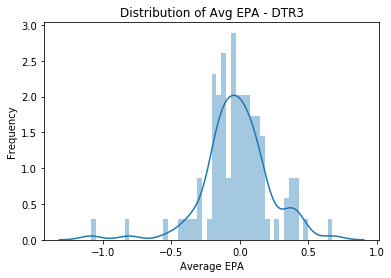

In [62]:
DTR2i = frequency[frequency['Position Alignment'].isin(['DTR3'])]
sns.distplot(DTR2i['Avg EPA'],bins=50)
plt.xlabel('Average EPA')
plt.ylabel('Frequency')
plt.title('Distribution of Avg EPA - DTR3')

In [63]:
kurt_DTR2i = DTR2i['Avg EPA'].kurt()
kurt_DTR2i

3.9582135722715077

Text(0.5,1,'Distribution of Avg EPA - DTR1')

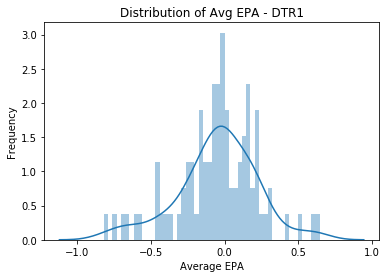

In [65]:
DTL2i = frequency[frequency['Position Alignment'].isin(['DTR1'])]
sns.distplot(DTL2i['Avg EPA'],bins=50)
plt.xlabel('Average EPA')
plt.ylabel('Frequency')
plt.title('Distribution of Avg EPA - DTR1')

In [66]:
kurt_DTL2i = DTL2i['Avg EPA'].kurt()
kurt_DTL2i

0.8549798606210746

Text(0.5,1,'Distribution of Avg EPA - DTL3')

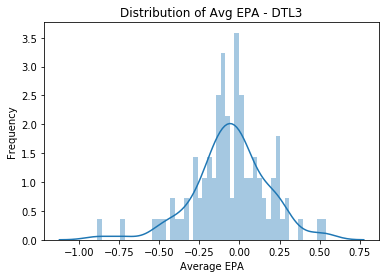

In [67]:
DER4i = frequency[frequency['Position Alignment'].isin(['DTL3'])]
sns.distplot(DER4i['Avg EPA'],bins=50)
plt.xlabel('Average EPA')
plt.ylabel('Frequency')
plt.title('Distribution of Avg EPA - DTL3')

In [68]:
kurt_DER4i = DER4i['Avg EPA'].kurt()
kurt_DER4i

1.6727518920194995

Text(0.5,1,'Distribution of Avg EPA - DTL1')

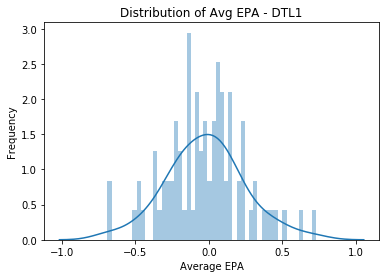

In [69]:
DTL4i = frequency[frequency['Position Alignment'].isin(['DTL1'])]
sns.distplot(DTL4i['Avg EPA'],bins=50)
plt.xlabel('Average EPA')
plt.ylabel('Frequency')
plt.title('Distribution of Avg EPA - DTL1')

In [70]:
kurt_DTL4i = DTL4i['Avg EPA'].kurt()
kurt_DTL4i

0.4883071120114417

Text(0.5,1,'Distribution of Avg EPA - DER9')

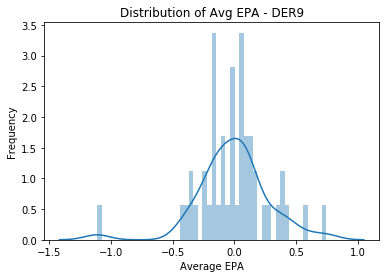

In [71]:
DEL4i = frequency[frequency['Position Alignment'].isin(['DER9'])]
sns.distplot(DEL4i['Avg EPA'],bins=50)
plt.xlabel('Average EPA')
plt.ylabel('Frequency')
plt.title('Distribution of Avg EPA - DER9')

In [72]:
kurt_DEL4i = DEL4i['Avg EPA'].kurt()
kurt_DEL4i

3.9109976097474703

#  In which in-game or roster construction scenarios would the answer to Question 1 change?

In [71]:
main.loc[main['Delta'] <= 8, 'high_leverage'] = 1
main.loc[main['Down'].isin([1,2]), 'early_down'] = 1
main.loc[main['Down'].isin([3,4]), 'late_down'] = 1
model_data = main[main['combination'].isin(high_freq['Position Alignment'])]
main['high_leverage'].fillna(0, inplace=True)
main['early_down'].fillna(0, inplace=True)
main['late_down'].fillna(0, inplace=True)
model_data.head()

C:\Users\Colin\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Colin\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,GameID,EventID,Season,Week,StadiumName,OffensiveTeam,DefensiveTeam,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,...,RecoveredFumble,AAV,rookie,z-score,combination,Delta,RushPlay,high_leverage,early_down,late_down
0,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,636964,1,-0.3,DTL1,0,1.0,1,1.0,0.0
1,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,17000000,0,0.4,DEL7,0,1.0,1,1.0,0.0
2,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,21000000,0,-0.9,DTR1,0,1.0,1,1.0,0.0
3,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,8387966,1,0.7,DER5,0,1.0,1,1.0,0.0
4,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,636964,1,-0.3,DTL1,0,1.0,1,1.0,0.0


In [72]:
model = ols('EPA ~ ToGo + C(SideOfField) + StartYard + high_leverage + early_down + late_down + RushPlay + Touchdown + Safety + Turnover + OffensiveYardage + AssistedTackle + SoloSack + AssistedSack + PassBreakup + C(combination)', data = model_data)
fitted_model = model.fit()
fitted_model.summary()

C:\Users\Colin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Colin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EPA   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1644.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:33:24   Log-Likelihood:                -11578.
No. Observations:               18456   AIC:                         2.321e+04
Df Residuals:                   18427   BIC:                         2.344e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1114      0.008    -13.331      0.000      -0.128      -0.095
C(SideOfField)[T.Own]           -0.0426      0.007     -6.092      0.000      -0.056      -0.029
high_leverage[T.C]               0.0215      0.009      2.387      0.017       0.004       0.039
C(combination)[T.DEL5]          -0.0660      0.025     -2.599      0.009      -0.116      -0.016
C(combination)[T.DEL6]          -0.0268      0.025     -1.080      0.280      -0.075       0.022
C(combination)[T.DEL7]          -0.0328      0.026     -1.243      0.214      -0.085       0.019
C(combination)[T.DEL9]           0.0026      0.024      0.106      0.916      -0.045       0.050
C(combination)[T.DELOutside]    -0.0154      0.024     -0.635      0.525      -0.063       0.032
C(combination)[T.DER3]          -0.0351      0.025     -1.409      0.159      -0.084       0.014
C(combination)[T.DER5]          -0.0032      0.025     -0.128      0.898      -0.052       0.046
C(combination)[T.DER6]          -0.0553      0.026     -2.143      0.032      -0.106      -0.005
C(combination)[T.DER7]          -0.0232      0.025     -0.912      0.362      -0.073       0.027
C(combination)[T.DER9]          -0.0081      0.024     -0.342      0.733      -0.055       0.038
C(combination)[T.DEROutside]    -0.0365      0.024     -1.495      0.135      -0.084       0.011
C(combination)[T.DTC0]          -0.0545      0.023     -2.355      0.019      -0.100      -0.009
C(combination)[T.DTL1]          -0.0256      0.021     -1.200      0.230      -0.067       0.016
C(combination)[T.DTL2i]         -0.0488      0.025     -1.973      0.048      -0.097      -0.000
C(combination)[T.DTL3]          -0.0251      0.020     -1.264      0.206      -0.064       0.014
C(combination)[T.DTR1]          -0.0189      0.021     -0.906      0.365      -0.060       0.022
C(combination)[T.DTR2i]         -0.0459      0.023     -1.986      0.047      -0.091      -0.001
C(combination)[T.DTR3]          -0.0272      0.020     -1.328      0.184      -0.067       0.013
ToGo                            -0.0090      0.001     -8.740      0.000      -0.011      -0.007
StartYard                       -0.0011      0.000     -4.179      0.000      -0.002      -0.001
early_down                      -0.0645      0.007     -9.124      0.000      -0.078      -0.051
late_down                       -0.0469      0.007     -6.318      0.000      -0.061      -0.032
RushPlay                        -0.1114      0.008    -13.331      0.000      -0.128      -0.095
Touchdown                        0.8198      0.020     41.359      0.000       0.781       0.859
Safety                          -1.1947      0.203     -5.881      0.000      -1.593      -0.796
Turnover                        -4.2703      0.042   -102.276      0.000    

In [73]:
coef = {'Position Alignment' : ['DEL5','DEL6','DEL7','DEL9','DELOutside','DER3','DER5','DER6','DER7','DER9','DEROutside','DTC0','DTL1','DTL2i','DTL3','DTR1','DTR2i','DTR3','DEL3'],'Hex Effect on EPA' : [-0.066,-0.0268,-0.0328,0.0026,-0.0154,-0.0351,-.00032,-0.0553,-0.0232,-0.0081,-0.0365,-0.0545,-0.0256,-0.0488,-0.0251,-0.0189,-0.0459,-0.0272,0]}
coef_effect = pd.DataFrame(data=coef)
high_freq = high_freq.merge(coef_effect)
high_freq.head()

,Position Alignment,Count,Avg EPA,Average Score Delta,Hex Effect on EPA
0,DEROutside,1801,-0.104577,1.005552,-0.0365
1,DTL2i,1514,-0.069014,1.708058,-0.0488
2,DTC0,2170,-0.060480,1.086175,-0.0545
3,DEL7,1079,-0.047380,1.324374,-0.0328
4,DTR2i,1986,-0.046978,2.562437,-0.0459


C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


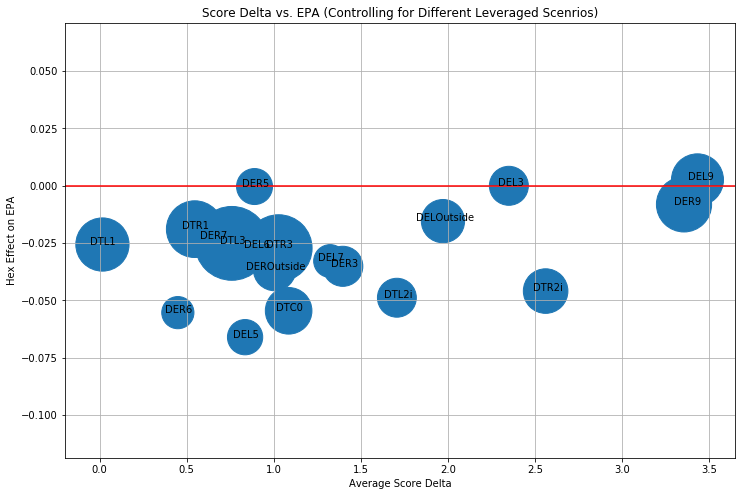

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Average Score Delta'],high_freq['Hex Effect on EPA'],s=high_freq['Count'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Average Score Delta'],high_freq['Hex Effect on EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Average Score Delta')
plt.ylabel('Hex Effect on EPA')
plt.title('Score Delta vs. EPA (Controlling for Different Leveraged Scenrios)')
plt.axhline(0, color = 'red')
plt.grid()
plt.show()

In [ ]:
coef = {'Position Alignment' : ['DEL5','DEL6','DEL7','DEL9','DELOutside','DER3','DER5','DER6','DER7','DER9','DEROutside','DTC0','DTL1','DTL2i','DTL3','DTR1','DTR2i','DTR3','DEL3'],'Hex Effect on EPA' : [-0.0679,-0.029,-0.0344,0.0025,-0.0167,-0.0359,-0.0048,-0.0581,-0.0254,-0.0078,-0.0386,-0.056,-0.0275,-0.0494,-0.0268,-0.0207,-0.0467,-0.029,0]}
coef_effect = pd.DataFrame(data=coef)
high_freq = high_freq.merge(coef_effect)

### In-game Scenarios

In [75]:
high_leverage = main[main['Delta'] <= 8]
early_down = main[main['Down'].isin([1,2])]
late_down = main[main['Down'].isin([3,4])]

### High Leverage Value

In [76]:
high_leverage[high_leverage['RosterPosition'].isin(['DE','DT'])][['RosterPosition','OffTeamScoreBefore','DefTeamScoreBefore','Quarter','TimeLeft','Down',
      'ToGo','StartYard','FirstDown','Touchdown','Turnover','OffensiveYardage','EPA','IsRushing','TechniqueName']].groupby('RosterPosition').mean().round(2)

,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,TimeLeft,Down,ToGo,StartYard,FirstDown,Touchdown,Turnover,OffensiveYardage,EPA,IsRushing
RosterPosition,,,,,,,,,,,,,
DE,11.74,9.36,2.45,425.74,1.81,8.54,29.39,0.29,0.04,0.02,5.32,-0.03,0.57
DT,11.83,8.95,2.44,448.03,1.68,8.46,28.77,0.28,0.04,0.02,5.25,-0.02,0.52


Text(0.5,1,'Representation by Position - High Leverage Scenario')

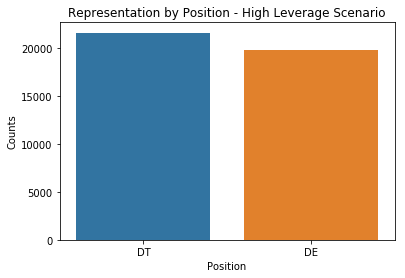

In [77]:
pos_counts = pd.DataFrame(pd.value_counts(high_leverage['RosterPosition']))
sns.barplot(x = pos_counts.index, y = 'RosterPosition', data = pos_counts)
plt.xlabel('Position')
plt.ylabel('Counts')
plt.title('Representation by Position - High Leverage Scenario')

In [78]:
per_combo = pd.DataFrame(high_leverage[['combination','EPA','Down','Delta']]
                         .groupby(['combination'])
                         .agg({'Down':'size', 'EPA':'mean','Delta':'mean'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','EPA':'Avg EPA','Delta':'Average Score Delta'})                        
                        .sort_values('Avg EPA'))
per_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1      87.1
0.2     172.0
0.3     248.3
0.4     337.2
0.5     579.5
0.6     774.8
0.7    1013.8
0.8    1350.8
0.9    2073.7
1.0    4402.0
Name: Count, dtype: float64

In [79]:
high_freq = per_combo[per_combo['Count'] > 774]
high_freq

,Position Alignment,Count,Avg EPA,Average Score Delta
23,DEROutside,1406,-0.098233,-3.193457
5,DEL3,1144,-0.064306,-2.269231
28,DTL2i,1183,-0.060982,-2.368555
21,DER7,1075,-0.052162,-2.643721
20,DER6,862,-0.044455,-2.771462
39,DTR2i,1498,-0.044290,-1.926569
24,DTC0,1745,-0.039407,-2.804011
8,DEL5,976,-0.036647,-3.238730
10,DEL7,862,-0.033934,-2.283063
11,DEL9,1996,-0.026826,-1.269038


In [48]:
high_leverage[['EventType','Delta','EPA']].groupby('EventType').mean().round(2)

,Delta,EPA
EventType,,
challenge pass,-1.60,-0.30
challenge rush,-3.43,-0.50
pass,-1.54,0.00
rush,-3.91,-0.06


C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


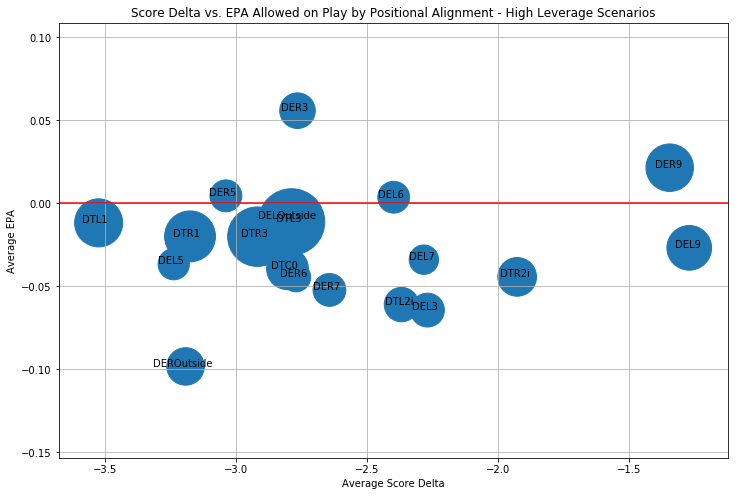

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Average Score Delta'],high_freq['Avg EPA'],s=high_freq['Count'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Average Score Delta'],high_freq['Avg EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Average Score Delta')
plt.ylabel('Average EPA')
plt.title('Score Delta vs. EPA Allowed on Play by Positional Alignment - High Leverage Scenarios')
plt.axhline(0, color = 'red')
plt.grid()
plt.show()

In [51]:
high_leverage[['combination','Turnover','FirstDown']].groupby('combination').mean().round(2)

,Turnover,FirstDown
combination,,
DEC0,0.05,0.31
DECOff Ball,0.02,0.32
DEL1,0.01,0.25
DEL2,0.03,0.25
DEL2i,0.02,0.29
DEL3,0.02,0.30
DEL4,0.01,0.28
DEL4i,0.02,0.28
DEL5,0.02,0.28


### Early Down Value

In [81]:
early_down[early_down['RosterPosition'].isin(['DE','DT'])][['RosterPosition','OffTeamScoreBefore','DefTeamScoreBefore','Quarter','TimeLeft','Down',
      'ToGo','StartYard','FirstDown','Touchdown','Turnover','OffensiveYardage','EPA','IsRushing','TechniqueName']].groupby('RosterPosition').mean().round(2)

,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,TimeLeft,Down,ToGo,StartYard,FirstDown,Touchdown,Turnover,OffensiveYardage,EPA,IsRushing
RosterPosition,,,,,,,,,,,,,
DE,10.57,12.42,2.58,419.83,1.43,9.03,29.46,0.25,0.04,0.02,5.37,-0.02,0.54
DT,10.61,11.60,2.53,448.97,1.42,8.95,28.99,0.25,0.04,0.02,5.32,-0.02,0.52


Text(0.5,1,'Representation by Position - Early Down Scenario')

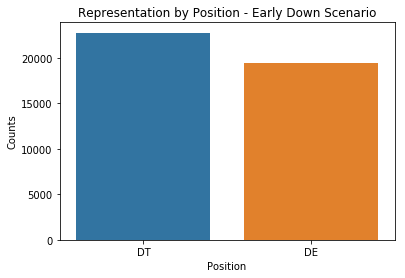

In [82]:
pos_counts = pd.DataFrame(pd.value_counts(early_down['RosterPosition']))
sns.barplot(x = pos_counts.index, y = 'RosterPosition', data = pos_counts)
plt.xlabel('Position')
plt.ylabel('Counts')
plt.title('Representation by Position - Early Down Scenario')

In [84]:
per_combo = pd.DataFrame(early_down[['combination','EPA','Down','Delta']]
                         .groupby(['combination'])
                         .agg({'Down':'size', 'EPA':'mean','Delta':'mean'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','EPA':'Avg EPA','Delta':'Average Score Delta'})                        
                        .sort_values('Avg EPA'))

per_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])


0.1      91.0
0.2     139.4
0.3     220.0
0.4     309.6
0.5     566.5
0.6     777.6
0.7    1111.5
0.8    1380.4
0.9    1973.9
1.0    4700.0
Name: Count, dtype: float64

In [85]:
high_freq = per_combo[per_combo['Count'] > 777]
high_freq

,Position Alignment,Count,Avg EPA,Average Score Delta
23,DEROutside,1416,-0.072674,0.590395
21,DER7,1126,-0.065323,0.675844
28,DTL2i,1327,-0.059775,1.850038
10,DEL7,931,-0.049469,1.138561
5,DEL3,1179,-0.047094,2.647159
37,DTR1,2784,-0.031884,0.622126
12,DELOutside,1450,-0.022675,1.856552
11,DEL9,1904,-0.021398,3.776786
24,DTC0,1564,-0.020264,0.865729
40,DTR3,3797,-0.014741,1.106400


In [56]:
early_down[['EventType','Delta','EPA']].groupby('EventType').mean().round(2)

,Delta,EPA
EventType,,
challenge pass,3.65,-0.29
challenge rush,-0.82,-0.27
pass,3.37,0.01
rush,-0.74,-0.05


C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


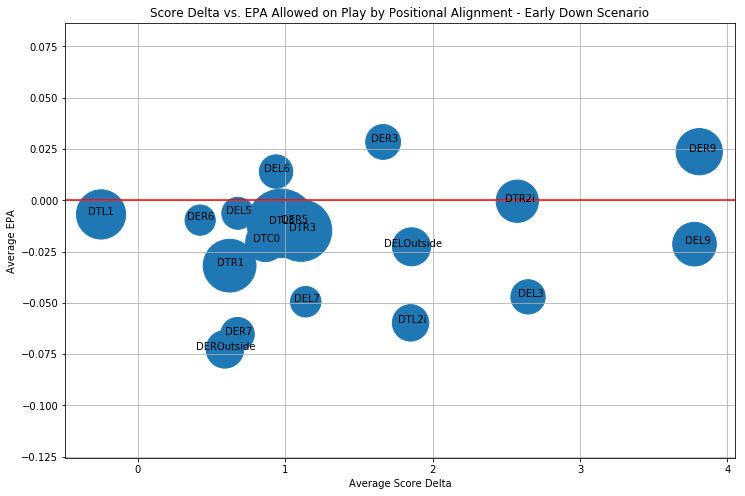

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Average Score Delta'],high_freq['Avg EPA'],s=high_freq['Count'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Average Score Delta'],high_freq['Avg EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Average Score Delta')
plt.ylabel('Average EPA')
plt.title('Score Delta vs. EPA Allowed on Play by Positional Alignment - Early Down Scenario')
plt.axhline(0, color = 'red')
plt.grid()
plt.show()

In [59]:
early_down[['combination','Turnover','FirstDown']].groupby('combination').mean().round(2)

,Turnover,FirstDown
combination,,
DEC0,0.05,0.25
DECOff Ball,0.02,0.23
DEL1,0.01,0.24
DEL2,0.02,0.21
DEL2i,0.02,0.25
DEL3,0.02,0.26
DEL4,0.01,0.24
DEL4i,0.02,0.26
DEL5,0.02,0.26


### Late Down Value

In [87]:
late_down[late_down['RosterPosition'].isin(['DE','DT'])][['RosterPosition','OffTeamScoreBefore','DefTeamScoreBefore','Quarter','TimeLeft','Down',
      'ToGo','StartYard','FirstDown','Touchdown','Turnover','OffensiveYardage','EPA','IsRushing','TechniqueName']].groupby('RosterPosition').mean().round(2)

,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,TimeLeft,Down,ToGo,StartYard,FirstDown,Touchdown,Turnover,OffensiveYardage,EPA,IsRushing
RosterPosition,,,,,,,,,,,,,
DE,10.63,12.55,2.61,403.69,3.08,7.01,29.55,0.39,0.05,0.03,5.09,-0.07,0.81
DT,11.17,12.40,2.66,401.68,3.10,5.92,28.19,0.42,0.07,0.03,4.73,-0.10,0.74


Text(0.5,1,'Representation by Position - Late Down Scenario')

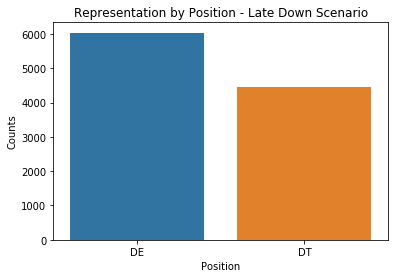

In [88]:
pos_counts = pd.DataFrame(pd.value_counts(late_down['RosterPosition']))
sns.barplot(x = pos_counts.index, y = 'RosterPosition', data = pos_counts)
plt.xlabel('Position')
plt.ylabel('Counts')
plt.title('Representation by Position - Late Down Scenario')

In [89]:
per_combo = pd.DataFrame(late_down[['combination','EPA','Down','Delta']]
                         .groupby(['combination'])
                         .agg({'Down':'size', 'EPA':'mean','Delta':'mean'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','EPA':'Avg EPA','Delta':'Average Score Delta'})                        
                        .sort_values('Avg EPA'))
per_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1     19.8
0.2     50.2
0.3     66.0
0.4    100.0
0.5    158.0
0.6    201.4
0.7    244.7
0.8    367.4
0.9    484.2
1.0    910.0
Name: Count, dtype: float64

In [90]:
high_freq = per_combo[per_combo['Count'] > 201]
high_freq

,Position Alignment,Count,Avg EPA,Average Score Delta
18,DER4i,262,-0.296318,2.213740
31,DTL4i,240,-0.237299,1.891667
23,DEROutside,385,-0.221912,2.532468
42,DTR4i,264,-0.212107,3.420455
7,DEL4i,273,-0.195287,2.684982
24,DTC0,606,-0.164271,1.655116
6,DEL4,237,-0.107182,2.852321
40,DTR3,677,-0.095445,0.593796
26,DTL1,410,-0.087492,1.592683
8,DEL5,223,-0.083070,1.560538


In [64]:
late_down[['EventType','Delta','EPA']].groupby('EventType').mean().round(2)

,Delta,EPA
EventType,,
challenge pass,0.17,-0.22
challenge rush,-4.45,-0.61
pass,2.44,-0.10
rush,-0.89,-0.03


C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


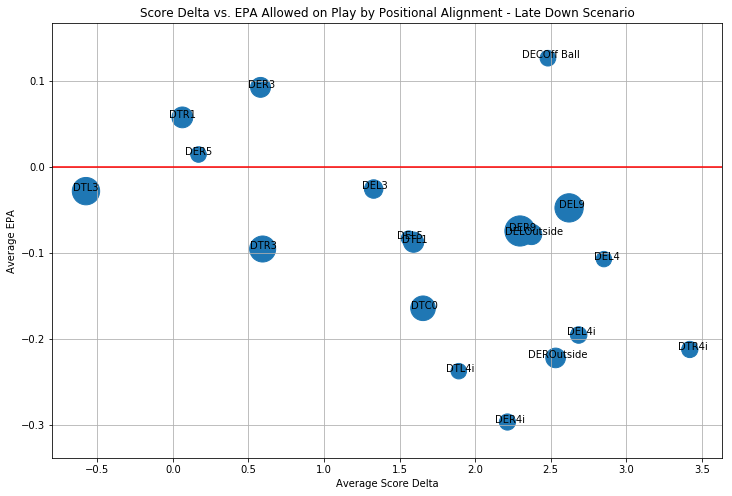

In [91]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Average Score Delta'],high_freq['Avg EPA'],s=high_freq['Count'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Average Score Delta'],high_freq['Avg EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Average Score Delta')
plt.ylabel('Average EPA')
plt.title('Score Delta vs. EPA Allowed on Play by Positional Alignment - Late Down Scenario')
plt.axhline(0, color = 'red')
plt.grid()
plt.show()

In [66]:
late_down[['combination','Turnover','FirstDown']].groupby('combination').mean().round(2)

,Turnover,FirstDown
combination,,
DEC0,0.04,0.38
DECOff Ball,0.02,0.39
DEL1,0.01,0.33
DEL2,0.09,0.45
DEL2i,0.02,0.44
DEL3,0.02,0.42
DEL4,0.02,0.36
DEL4i,0.04,0.37
DEL5,0.03,0.44


### Roster Construction

In [44]:
main['AAV'] = main['AAV']/1000000
main[main['RosterPosition'].isin(['DE','DT'])][['RosterPosition','EPA','AAV','rookie']].groupby('RosterPosition').mean().round(2)

C:\Users\Colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EPA,AAV,rookie
RosterPosition,,,
DE,-0.03,6.60,0.34
DT,-0.03,5.35,0.35


In [45]:
per_combo = pd.DataFrame(main[['combination','Down','EPA','AAV','rookie']]
                         .groupby(['combination'])
                         .agg({'Down':'size', 'EPA':'mean','AAV':'mean','rookie':'mean'})
                         .reset_index()
                         .rename(columns={'combination':'Position Alignment','Down':'Count','EPA':'Avg EPA','AAV':'Average AAV','rookie':'Proportion of Players on Rookie Contracts'})                        
                        .sort_values('Avg EPA'))
per_combo['Count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1     107.7
0.2     228.4
0.3     302.2
0.4     439.4
0.5     742.5
0.6     993.6
0.7    1289.9
0.8    1723.0
0.9    2743.4
1.0    5449.0
Name: Count, dtype: float64

In [46]:
high_freq = per_combo[per_combo['Count'] > 993]
high_freq

,Position Alignment,Count,Avg EPA,Average AAV,Proportion of Players on Rookie Contracts
23,DEROutside,1801,-0.104577,8.052367,0.392004
28,DTL2i,1514,-0.069014,4.407345,0.329590
24,DTC0,2170,-0.060480,4.980750,0.363134
10,DEL7,1079,-0.047380,7.114053,0.337349
39,DTR2i,1986,-0.046978,3.534399,0.395267
21,DER7,1301,-0.044809,6.686394,0.328209
5,DEL3,1520,-0.042318,3.972979,0.301316
12,DELOutside,1871,-0.035217,7.678808,0.354890
20,DER6,1036,-0.035165,7.523415,0.349421
11,DEL9,2705,-0.029185,7.980092,0.322366


In [47]:
main[['EventType','AAV','rookie','EPA']].groupby('EventType').mean().round(2)

,AAV,rookie,EPA
EventType,,,
challenge pass,6.34,0.30,-0.27
challenge rush,5.60,0.31,-0.36
pass,6.20,0.35,-0.02
rush,5.64,0.34,-0.05


In [48]:
player_combo = pd.DataFrame(main[['combination','Name','Down','AAV']]
                 .groupby(['combination','Name'])
                 .agg({'Down':'size','AAV':'mean'})
                 .reset_index()
                 .rename(columns={'combination':'Position Alignment','Name':'Player Name','Down':'Count','AAV':'Avg AAV'})                        
                 .sort_values('Count', ascending=False))
hex_combo = pd.DataFrame(main[['combination','Down','EPA']]
                 .groupby(['combination'])
                 .agg({'Down':'size','EPA':'mean'})
                 .reset_index()
                 .rename(columns={'combination':'Position Alignment','Down':'Total','EPA':'Avg EPA'})                        
                 .sort_values('Total', ascending=False))

combo = player_combo.merge(hex_combo)
combo['Weighted Avg AAV'] = (combo['Count']/combo['Total']) * combo['Avg AAV']
w_AAV = combo[['Position Alignment','Weighted Avg AAV']].groupby('Position Alignment').sum().round(2).reset_index()
AAV_vs_EPA = w_AAV.merge(hex_combo).sort_values('Total',ascending=False)
AAV_vs_EPA.head()

,Position Alignment,Weighted Avg AAV,Total,Avg EPA
29,DTL3,6.54,5449,-0.013618
40,DTR3,6.20,4474,-0.026953
37,DTR1,3.65,3216,-0.019893
22,DER9,7.94,3047,-0.005631
26,DTL1,4.08,2833,-0.018554


In [49]:
AAV_vs_EPA.mean()

Weighted Avg AAV       6.175625
Total               1098.125000
Avg EPA               -0.027464
dtype: float64

In [50]:
AAV_vs_EPA['Total'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1     107.7
0.2     228.4
0.3     302.2
0.4     439.4
0.5     742.5
0.6     993.6
0.7    1289.9
0.8    1723.0
0.9    2743.4
1.0    5449.0
Name: Total, dtype: float64

In [51]:
high_freq = AAV_vs_EPA[AAV_vs_EPA['Total'] > 993]
high_freq.sort_values('Avg EPA')

,Position Alignment,Weighted Avg AAV,Total,Avg EPA
23,DEROutside,8.05,1801,-0.104577
28,DTL2i,4.41,1514,-0.069014
24,DTC0,4.98,2170,-0.060480
10,DEL7,7.11,1079,-0.047380
39,DTR2i,3.53,1986,-0.046978
21,DER7,6.69,1301,-0.044809
5,DEL3,3.97,1520,-0.042318
12,DELOutside,7.68,1871,-0.035217
20,DER6,7.52,1036,-0.035165
11,DEL9,7.98,2705,-0.029185


In [52]:
coef = {'Position Alignment' : ['DEL5','DEL6','DEL7','DEL9','DELOutside','DER3','DER5','DER6','DER7','DER9','DEROutside','DTC0','DTL1','DTL2i','DTL3','DTR1','DTR2i','DTR3','DEL3'],'Hex Effect on EPA' : [-0.0679,-0.029,-0.0344,0.0025,-0.0167,-0.0359,-0.0048,-0.0581,-0.0254,-0.0078,-0.0386,-0.056,-0.0275,-0.0494,-0.0268,-0.0207,-0.0467,-0.029,0]}
coef_effect = pd.DataFrame(data=coef)
high_freq = high_freq.merge(coef_effect)
high_freq.head()

,Position Alignment,Weighted Avg AAV,Total,Avg EPA,Hex Effect on EPA
0,DTL3,6.54,5449,-0.013618,-0.0268
1,DTR3,6.20,4474,-0.026953,-0.0290
2,DTR1,3.65,3216,-0.019893,-0.0207
3,DER9,7.94,3047,-0.005631,-0.0078
4,DTL1,4.08,2833,-0.018554,-0.0275


C:\Users\Colin\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


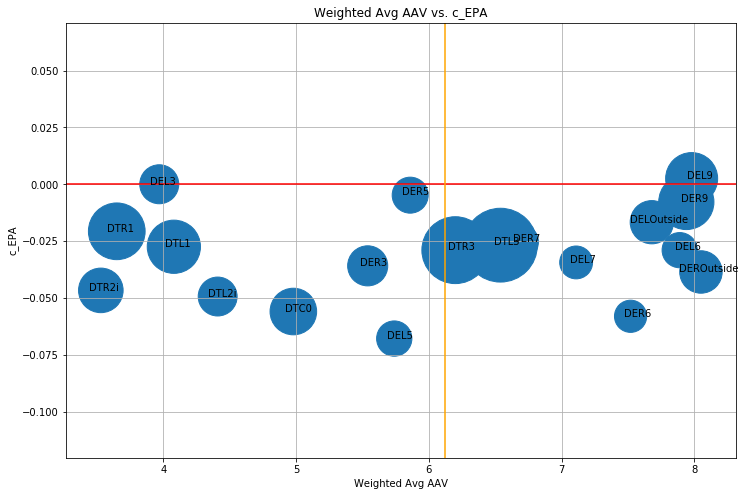

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(high_freq['Weighted Avg AAV'],high_freq['Hex Effect on EPA'],s=high_freq['Total'])
for label,x,y in zip(high_freq['Position Alignment'],high_freq['Weighted Avg AAV'],high_freq['Hex Effect on EPA']):    
    
    plt.annotate(label, # this is the text
                 xy = (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Weighted Avg AAV')
plt.ylabel('c_EPA')
plt.title('Weighted Avg AAV vs. c_EPA')
plt.axhline(0, color = 'red')
plt.axvline(6.12, color = 'orange')
plt.grid()
plt.show()

In [111]:
w_AAV = AAV_vs_EPA[['Position Alignment','Weighted Avg AAV']]

In [112]:
player_choice = pd.DataFrame(main[['combination','Name','EPA','Down','Delta','AAV','z-score','rookie']]
                 .groupby(['combination','Name'])
                 .agg({'Down':'size', 'EPA':'mean','AAV':'mean','z-score':'mean','rookie':'mean'})
                 .reset_index()
                 .rename(columns={'combination':'Position Alignment','Name':'Player Name','Down':'Count','EPA':'Avg EPA','AAV':'Average AAV','z-score':'z-score','rookie':'Rookie Contract'})                        
                 .sort_values('Avg EPA')
                 .merge(w_AAV))

player_choice['Count'].quantile([.8,.85,.9,.95,1])

0.80     33.0
0.85     43.0
0.90     58.0
0.95     82.7
1.00    272.0
Name: Count, dtype: float64

In [114]:
high_freq = player_choice[(player_choice['Count'] > 65) & (player_choice['Avg EPA'] < 0) & (player_choice['Average AAV'] < player_choice['Weighted Avg AAV'])]
high_freq.sort_values('Average AAV')

,Position Alignment,Player Name,Count,Avg EPA,Average AAV,z-score,Rookie Contract,Weighted Avg AAV
1486,DTR3,John Atkins,88,-0.024845,0.540000,-2.6,1,6.20
1326,DTL1,Poona Ford,82,-0.202601,0.572667,-0.7,1,4.08
1223,DTR1,Poona Ford,107,-0.025338,0.572667,-0.7,1,3.65
428,DER7,Al-Quadin Muhammad,83,-0.121388,0.645000,-0.6,0,6.69
1325,DTL1,Sebastian Joseph-Day,74,-0.205077,0.653809,0.8,1,4.08
334,DTL2i,Grover Stewart,103,-0.133034,0.704912,-0.1,1,4.41
1660,DER9,Trey Hendrickson,83,-0.195692,0.793947,1.1,1,7.94
1676,DER9,Maxx Crosby,98,-0.016187,0.825566,1.2,1,7.94
35,DEROutside,Tarell Basham,118,-0.166624,0.838964,0.3,1,8.05
918,DELOutside,Tarell Basham,126,-0.156880,0.838964,0.3,1,7.68
